In [1]:
#dependencies
import pandas as pd
import tweepy
import time
import json
import random
from config import consumer_key, consumer_secret, access_token, access_token_secret
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import matplotlib.pyplot as plt

In [2]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [3]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Target User BBC, CBS, CNN, Fox, and New York times
target_user = ("BBC", "CBS", "CNN", "Fox", "nytimes")

In [5]:
#sentiment holder
sentiments = []

In [6]:
#loop through each term
for user in target_user:
    compound_list = []
    counter = 1
    
    #get feed
    for x in range(5):
        public_tweets = api.user_timeline('@' + user, page=x)
        
        for tweet in public_tweets:
            #vader!
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter


            
            sentiments.append({"User": user, 
                               "Date": tweet["created_at"],
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                                "Tweets Ago": counter})
            counter = counter + 1

In [7]:
#convert sentiments[] to df
sentiments_df = pd.DataFrame(sentiments,
                            columns=["User","Date","Tweet","Positive","Negative","Neutral","Tweets Ago","Compound"])
sentiments_df.to_csv('NewsTudes.csv')
sentiments_df.head()

,User,Date,Tweet,Positive,Negative,Neutral,Tweets Ago,Compound
0,BBC,Sat Jun 09 20:04:00 +0000 2018,Would you describe yourself as a feminist?\n#H...,0.000,1.000,0.000,1,0.0000
1,BBC,Sat Jun 09 19:02:05 +0000 2018,What is it like being Germaine Greer? This obs...,0.122,0.878,0.000,2,0.3612
2,BBC,Sat Jun 09 18:04:03 +0000 2018,The cast of @QueerEye brought a bag of goodies...,0.000,1.000,0.000,3,0.0000
3,BBC,Sat Jun 09 17:01:05 +0000 2018,One hundred years after some women won the rig...,0.171,0.829,0.000,4,0.5719
4,BBC,Sat Jun 09 16:04:03 +0000 2018,"A year on from the Grenfell Tower fire, Sean a...",0.222,0.623,0.156,5,0.4019


In [8]:
sns.set_style("ticks")
plt.style.use("seaborn")


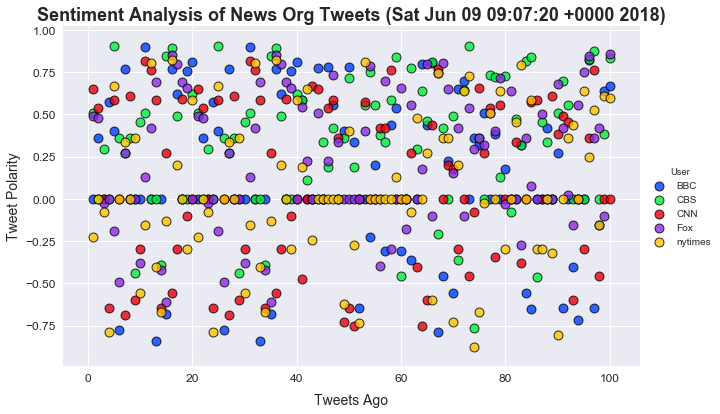

In [9]:
#scatterplot with seaborn
sns.lmplot(x ="Tweets Ago", 
           y ="Compound",
           data=sentiments_df, 
           hue="User",
           fit_reg=False,
           palette = "bright",
           size = 6,
           aspect = 1.5,
           scatter_kws={"marker": "D",
                        "s": 80,
                      "edgecolor":sns.xkcd_rgb["black"],
                      "linewidth": 1})
plt.title("Sentiment Analysis of News Org Tweets ({})".format(tweet["created_at"]), fontsize = 18, fontweight='bold')
plt.xlabel("Tweets Ago", labelpad=10, fontsize = 14)
plt.ylabel("Tweet Polarity",fontsize = 14)
plt.subplots_adjust(top=0.88)
plt.xticks(size = 12)
plt.yticks(size = 12)

# Save png
plt.savefig("Sentiment_Analysis_ScatterPlot.png")

plt.show()


In [10]:
# Group and calc overall compound score
overall_sentiment = sentiments_df.groupby(['User']).mean()["Compound"]
overall_sentiment_pd = pd.DataFrame.from_dict(overall_sentiment)
overall_sentiment_pd["Compound"]

User
BBC        0.138268
CBS        0.320494
CNN        0.093490
Fox        0.241468
nytimes    0.063328
Name: Compound, dtype: float64

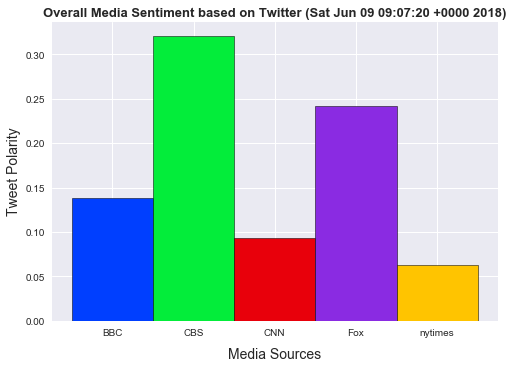

In [11]:
# make bar chart with matplotlib
colors = ("#003FFF", "#03ED3A", "#E8000B", "#8A2BE2", "#FFC400")
plt.bar(target_user, overall_sentiment_pd["Compound"], color=colors, alpha = 1, width =1, 
        edgecolor="black", linewidth=0.5)

#title, x and y labels
plt.title("Overall Media Sentiment based on Twitter ({})".format(tweet["created_at"]), fontsize = 13, 
          fontweight='bold')
plt.xlabel("Media Sources", labelpad=10, fontsize = 14)
plt.ylabel("Tweet Polarity",fontsize = 14)

plt.show()
# Save png
plt.savefig("Overall_Sentiment_Analysis_BarChart.png")